<a href="https://colab.research.google.com/github/geekysharzeel/-Technocolabs-Internship-Project/blob/main/bit_coin2(3%264).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 5

#  Import required libraries
import numpy as np
import pandas as pd
%matplotlib inline

Autosaving every 5 seconds


In [ ]:
#  Load the dataset as a pandas DataFrame
bitcoin = pd.read_csv('bitcoin_historical_prices.csv')

#  Change `date` column to datetime type
bitcoin['date'] = pd.to_datetime(bitcoin['date'])
bitcoin.head()

,date,iso_week,open,high,low,close,volume,market_capitalization
0,2013-04-28,2013-17,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,2013-17,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,2013-17,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,2013-17,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,2013-17,116.38,125.60,92.28,105.21,NaN,1.292190e+09


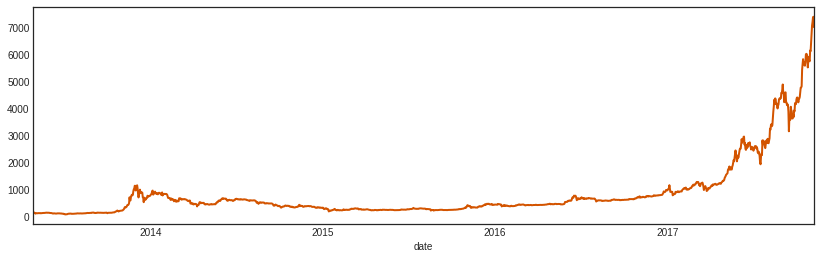

In [ ]:
#  Time-series plot for `close` variable
bitcoin.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

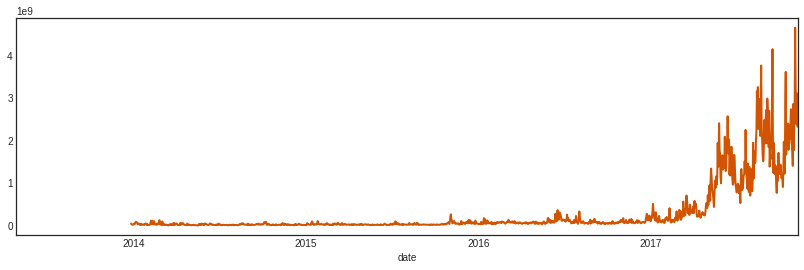

In [ ]:
bitcoin.set_index('date')['volume'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

In [ ]:
# Filter for newer or equal to Jan 1, 2016
bitcoin_recent = bitcoin[bitcoin['date'] >= '2016-01-01']

In [ ]:
#  Keep only the `close` and `volume` variables
bitcoin_recent = bitcoin_recent[['date', 'iso_week', 'close', 'volume']]

In [ ]:
"""
Series of normalization functions useful
for normalizing time-series data.

Author: Luis Capelo
"""
def z_score(series):
    """
    Computes the normalized value using the Z-score
    technique. The Z-score is a technique used for
    normalizing Gaussian distributions representing
    each observation in relation to the distribution's
    mean and standard deviation. For precise definitions,
    see the Wikipedia article:
    
        https://en.wikipedia.org/wiki/Standard_score
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    result = (series - series.mean()) / series.std(ddof=0)
    return result

def point_relative_normalization(series):
    """
    Computes the normalized value for the values of a
    given series by using the first element of the serie as p_0
    as a reference for each p_i.
    
    This technique comes from Siraj Raval's YouTube video
    "How to Predict Stock Prices Easily - Intro to Deep Learning #7",
    available at:
    
        https://www.youtube.com/watch?v=ftMq5ps503w
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    result = (series / series.values[0]) - 1
    return result

def maximum_and_minimum_normalization(series, boundary=(0, 1)):
    """
    Computes the normalized value for the values of a
    given serie by using that series maximum and minimum
    values.
    
    This technique is a direct implementation from 
    scikit-learn, available at:
    
        http://scikit-learn.org/stable/modules/generated/\
            sklearn.preprocessing.MinMaxScaler.html
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    boundary: set
        Maximum and minimum values used to
        scale the series.
        
    Returns
    -------
    result: list
        List with the normalized results.
    """
    range_min, range_max = boundary
    standard_deviation = (series - series.min(axis=0)) / (series.max(axis=0) - series.min(axis=0))
    result = standard_deviation * (range_max - range_min) + range_min

    return result

In [ ]:
#  Normalize our data for the the `close` variable.
bitcoin_recent['close_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['close'].apply(
    lambda x: point_relative_normalization(x))

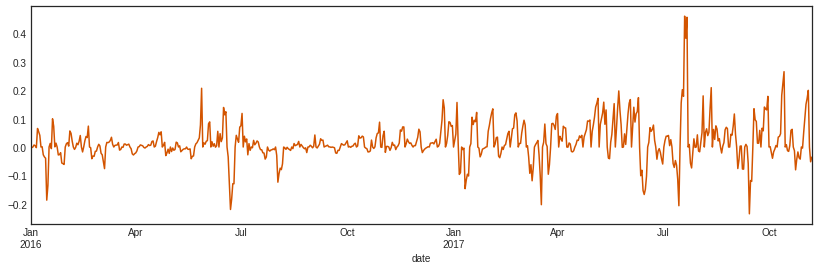

In [ ]:
#  Plot for normalized variable `close_point_relative_normalization`
bitcoin_recent.set_index('date')['close_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

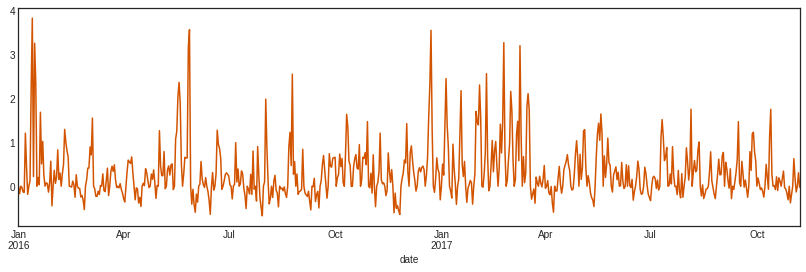

In [ ]:
#  Normalize our data for the the `volume` variable.
bitcoin_recent['volume_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['volume'].apply(
    lambda x: point_relative_normalization(x))
#  Plot for normalized variable `volume_point_relative_normalization`
bitcoin_recent.set_index('date')['volume_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

In [ ]:
#  Use the last 20% of available weeks as a test set and the first 80% as a training set.
boundary = int(0.8 * bitcoin_recent['iso_week'].nunique())
train_set_weeks = bitcoin_recent['iso_week'].unique()[0:boundary]
test_set_weeks = bitcoin_recent[~bitcoin_recent['iso_week'].isin(train_set_weeks)]['iso_week'].unique()

print(train_set_weeks)
print(test_set_weeks)

['2016-00' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2016-13'
 '2016-14' '2016-15' '2016-16' '2016-17' '2016-18' '2016-19' '2016-20'
 '2016-21' '2016-22' '2016-23' '2016-24' '2016-25' '2016-26' '2016-27'
 '2016-28' '2016-29' '2016-30' '2016-31' '2016-32' '2016-33' '2016-34'
 '2016-35' '2016-36' '2016-37' '2016-38' '2016-39' '2016-40' '2016-41'
 '2016-42' '2016-43' '2016-44' '2016-45' '2016-46' '2016-47' '2016-48'
 '2016-49' '2016-50' '2016-51' '2016-52' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2017-13' '2017-14' '2017-15' '2017-16' '2017-17'
 '2017-18' '2017-19' '2017-20' '2017-21' '2017-22' '2017-23' '2017-24'
 '2017-25']
['2017-26' '2017-27' '2017-28' '2017-29' '2017-30' '2017-31' '2017-32'
 '2017-33' '2017-34' '2017-35' '2017-36' '2017-37' '2017-38' '2017-39'
 '2017-40' '2017-41' '2017-42' '2017-43' '2017-44' '2017-45']


In [ ]:
#  Create train dataset
train_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(train_set_weeks)]

In [ ]:
#  Create test dataset
test_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(test_set_weeks)]

In [ ]:
bitcoin_recent.to_csv('bitcoin_recent.csv', index=False)
train_dataset.to_csv('train_dataset.csv', index=False)
test_dataset.to_csv('test_dataset.csv', index=False)

In [ ]:
%autosave 5

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation
from keras.callbacks import TensorBoard

Autosaving every 5 seconds


In [ ]:
period_length =7
number_of_periods=76

In [ ]:
def build_model(period_length, number_of_periods, batch_size=1):
    """Build an LSTM model using Keras.

    Parameters
    ----------
    period_length: int
        The size of each observation used as input.

    number_of_periods: int
        The number of periods available in the
        dataset.

    batch_size: int
        The size of the batch used in each training
        period.

    Returns
    -------
    model: Keras model
        Compiled Keras model that can be trained
        and stored in disk.
    """
    model = Sequential()
    model.add(LSTM(
        units=period_length,
        batch_input_shape=(batch_size, number_of_periods, period_length),
        input_shape=(number_of_periods, period_length),
        return_sequences=False, stateful=False))

    model.add(Dense(units=period_length))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")

    return model

In [ ]:
model = build_model(period_length=period_length, number_of_periods=number_of_periods)

In [ ]:
model.save('bitcoin_lstm_v0.h5')

In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from keras.models import load_model

Autosaving every 5 seconds


In [ ]:
#  Import training dataset
train = pd.read_csv('train_dataset.csv')
train.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
0,2016-01-01,2016-00,434.33,36278900.0,0.000000,0.000000
1,2016-01-02,2016-00,433.44,30096600.0,-0.002049,-0.170410
2,2016-01-03,2016-01,430.01,39633800.0,0.000000,0.000000
3,2016-01-04,2016-01,433.09,38477500.0,0.007163,-0.029175
4,2016-01-05,2016-01,431.96,34522600.0,0.004535,-0.128961


In [ ]:
def create_groups(data, group_size=7):
    """Create distinct groups from a continuous series.
    
    Parameters
    ----------
    data: np.array
        Series of continious observations.

    group_size: int, default 7
        Determines how large the groups are. That is,
        how many observations each group contains.
    
    Returns
    -------
    A Numpy array object. 
    """
    samples = []
    for i in range(0, len(data), group_size):
        sample = list(data[i:i + group_size])
        if len(sample) == group_size:
            samples.append(np.array(sample).reshape(1, group_size))
    
    return np.array(samples)

In [ ]:
#  Find the remainder when the number of observations is divided by group size
len(train) % 7

2

In [ ]:
#  Create groups of 7 from our data.
#  We drop the first two observations so that the
#  number of total observations is divisible by the `group_size`.
data = create_groups(train['close_point_relative_normalization'][2:].values)
print(data.shape)

(77, 1, 7)


In [ ]:
#  Reshape data into format expected by LSTM layer
X_train = data[:-1, :].reshape(1, 76, 7)
Y_validation = data[-1].reshape(1, 7)
print(X_train.shape)
print(Y_validation.shape)

(1, 76, 7)
(1, 7)


In [ ]:
#  Load our previously trained model 
model = load_model('bitcoin_lstm_v0.h5')

In [ ]:
%%time
#  Train the model
history = model.fit(
    x=X_train, y=Y_validation,
    batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 3/100
1/1 [==============================] - 0s 983us/step - loss: 0.0022
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 5/100
1/1 [==============================] - 0s 856us/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8/100
1/1 [==============================] - 0s 896us/step - loss: 0.0011
Epoch 9/100
1/1 [==============================] - 0s 855us/step - loss: 9.4243e-04
Epoch 10/100
1/1 [==============================] - 0s 953us/step - loss: 8.3095e-04
Epoch 11/100
1/1 [==============================] - 0s 996us/step - loss: 7.3279e-04
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 6.4601e-04
Epoch 13/100
1/1 [==============

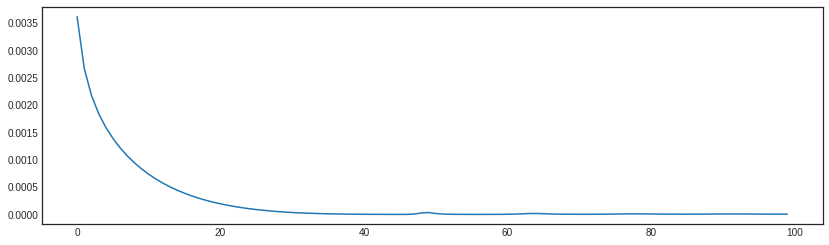

In [ ]:
#  Plot loss function
pd.Series(history.history['loss']).plot(figsize=(14, 4));

In [ ]:
#  Make predictions using X_train data
predictions = model.predict(x=X_train)[0]
predictions

array([-0.00317569,  0.01484029,  0.0717354 ,  0.05797122,  0.0623933 ,
        0.0757916 ,  0.02132091], dtype=float32)

In [ ]:
def denormalize(series, last_value):
    """Denormalize the values for a given series.
    
    This uses the last value available (i.e. the last
    closing price of the week before our prediction)
    as a reference for scaling the predicted results.
    """
    result = last_value * (series + 1)
    return result

In [ ]:
#  Denormalize predictions
last_weeks_value = train[train['date'] == train['date'][:-7].max()]['close'].values[0]

denormalized_prediction = denormalize(predictions, last_weeks_value)
denormalized_prediction

array([2647.4456, 2695.2937, 2846.4004, 2809.8445, 2821.589 , 2857.1733,
       2712.5056], dtype=float32)

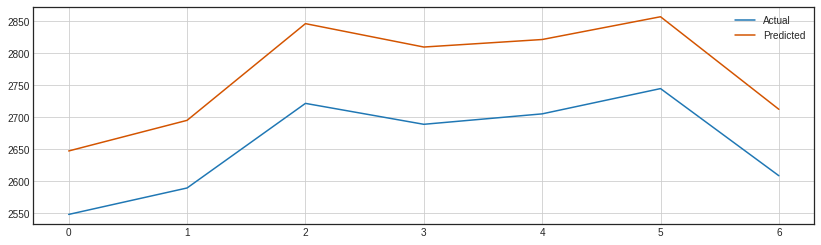

In [ ]:
#  Plot denormalized predictions against actual predictions
plt.figure(figsize=(14, 4))

plt.plot(train['close'][-7:].values, label='Actual')
plt.plot(denormalized_prediction, color='#d35400', label='Predicted')

plt.grid()
plt.legend();

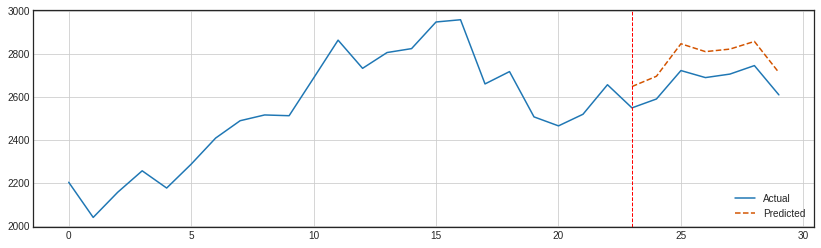

In [ ]:
prediction_plot = np.zeros(len(train)-2)
prediction_plot[:] = np.nan
prediction_plot[-7:] = denormalized_prediction

plt.figure(figsize=(14, 4))
plt.plot(train['close'][-30:].values, label='Actual')
plt.plot(prediction_plot[-30:], color='#d35400', linestyle='--', label='Predicted')
plt.axvline(30 - 7, color='r', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='lower right');

In [ ]:
model = build_model(period_length=period_length, number_of_periods=number_of_periods)
model.save('bitcoin_lstm_v0.h5.2')


INFO:tensorflow:Assets written to: bitcoin_lstm_v0.h5.2/assets


ACTIVITY 4

In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from keras.models import load_model
from keras.callbacks import TensorBoard
from datetime import datetime, timedelta

from utilities_activity6 import *

np.random.seed(0)

Autosaving every 5 seconds


In [ ]:
#  Load datasets
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [ ]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)

test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [ ]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

In [ ]:
def train_model(model, X, Y, epochs, version, run_number):
    """Training a model with TensorBoard callback.

    This function names each run of the model
    using the TensorBoard naming conventions.

    Parameters
    ----------
    model: Keras model instance
        Compiled Keras model.

    X, Y: np.array
        Series of observations to be used in
        the training process.

    epochs: int
        The number of epochs to train the
        model for.

    version: int
        Version of the model to run.

    run_number: int
        The number of the run. Used in case
        the same model version is run again.
    """
    model_name = f'bitcoin_lstm_v{version}_run_{run_number}'
    tensorboard = TensorBoard(log_dir=f'./logs/{model_name}')

 

 


    model_history = model.fit(
        x=X, y=Y,
        batch_size=1, epochs=epochs,
        shuffle=False,callbacks=[tensorboard])

    return model_history

In [ ]:
#  Load previously trained network
model = load_model('bitcoin_lstm_v0.h5')

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#  Retrain network
model_history = train_model(model=model,
                            X=X_train, Y=Y_train,
                            epochs=1000,
                            version=0, run_number=2)

Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.4243e-04
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.3095e-04
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.3279e-04
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.4601e-04
Epoch 13/1000
1/1 [==============

In [ ]:
#%tensorboard --logdir=model_name

In [ ]:
#  Combine training and testing datasets
combined_set = np.concatenate((train_data, test_data), axis=1)

In [ ]:
#  Evaluate model at each week for the test set
evaluated_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 77]

    X_test = input_series[0:, :-1].reshape(1, input_series.shape[1] - 1, 7)
    Y_test = input_series[0:, -1:][0]

    result = model.evaluate(x=X_test, y=Y_test, verbose=0)
    evaluated_weeks.append(result)

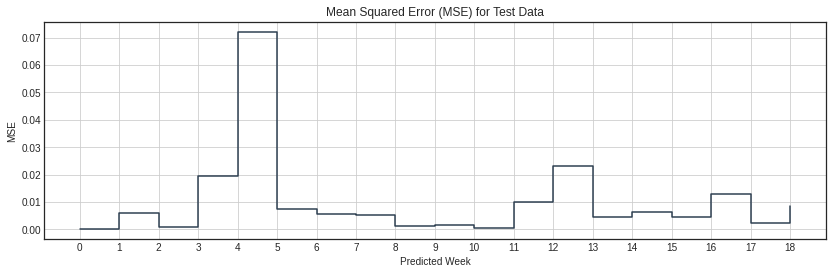

In [ ]:
#  Plot MSE for all evaluated weeks
ax = pd.Series(evaluated_weeks).plot(drawstyle="steps-post",
                                     figsize=(14, 4),
                                     color='#2c3e50',
                                     grid=True,
                                     title='Mean Squared Error (MSE) for Test Data')

ax.set_xticks(range(0, len(evaluated_weeks)))
ax.set_xlabel("Predicted Week")
ax.set_ylabel("MSE")
plt.show()

In [ ]:
#  Make predictions for each of the 19 weeks
#  in the test set
predicted_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 76]
    predicted_weeks.append(model.predict(input_series))

In [ ]:
#  Flatten `predicted_weeks` to get a list
#  of predictions for each day in the 19 weeks
predicted_days = []
for week in predicted_weeks:
    predicted_days += list(week[0])

In [ ]:
#  Create list of dates associated with predictions
last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
list_of_days = []
for days in range(1, len(predicted_days) + 1):
    D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
    list_of_days.append(D)

In [ ]:
#  Create dataframe with predicted values
predicted = pd.DataFrame({
    'date': list_of_days,
    'close_point_relative_normalization': predicted_days
})
predicted.head()

,date,close_point_relative_normalization
0,2017-06-25,-0.002101
1,2017-06-26,0.014866
2,2017-06-27,0.069467
3,2017-06-28,0.056190
4,2017-06-29,0.061791


In [ ]:
#  Convert `date` variable to datetime
predicted['date'] = predicted['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
def plot_two_series(A, B, variable, title):
    """Plot two series using the same `date` index. 
    
    Parameters
    ----------
    A, B: pd.DataFrame
        Dataframe with a `date` key and a variable
        passed in the `variable` parameter. Parameter A
        represents the "Observed" series and B the "Predicted"
        series. These will be labelled respectively. 
    
    variable: str
        Variable to use in plot.
    
    title: str
        Plot title.
    """
    plt.figure(figsize=(14, 4))
    plt.xlabel('Observed and predicted')

    ax1 = A.set_index('date')[variable].plot(
        color='#d35400', grid=True, label='Observed', title=title)

    ax2 = B.set_index('date')[variable].plot(
        color='grey', grid=True, label='Predicted')
    
    ax1.set_xlabel("Predicted Week")
    ax1.set_ylabel("Predicted Values")

    plt.legend()
    plt.show()

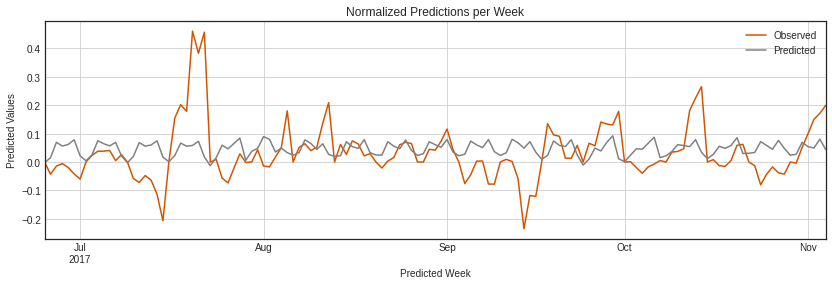

In [ ]:
#  Plot predicted normalized prices
#  against actual normalized prices
plot_two_series(A=test[:-3],
                B=predicted,
                variable='close_point_relative_normalization',
                title='Normalized Predictions per Week')

In [ ]:
#  Add variable `iso_week` by stripping the Year and Week from `date`
predicted['iso_week'] = predicted['date'].apply(
    lambda x: x.strftime('%Y-%U'))

In [ ]:
def denormalize(reference, series,
                normalized_variable='close_point_relative_normalization',
                denormalized_variable='close'):
    """Denormalize the values for a given series.

    Parameters
    ----------
    reference: pd.DataFrame
        DataFrame to use as reference. This dataframe
        contains both a week index and the USD price
        reference that we are interested on.

    series: pd.DataFrame
        DataFrame with the predicted series. The
        DataFrame must have the same columns as the
        `reference` dataset.

    normalized_variable: str, default 'close_point_relative_normalization'
        Variable to use in normalization.

    denormalized_variable: str, default `close`
        Variable to use in de-normalization.

    Returns
    -------
    A modified DataFrame with the new variable provided
    in `denormalized_variable` parameter.
    """
    week_values = reference[reference['iso_week'] == series['iso_week'].values[0]]
    last_value = week_values[denormalized_variable].values[0]
    series[denormalized_variable] = last_value * (series[normalized_variable] + 1)

    return series

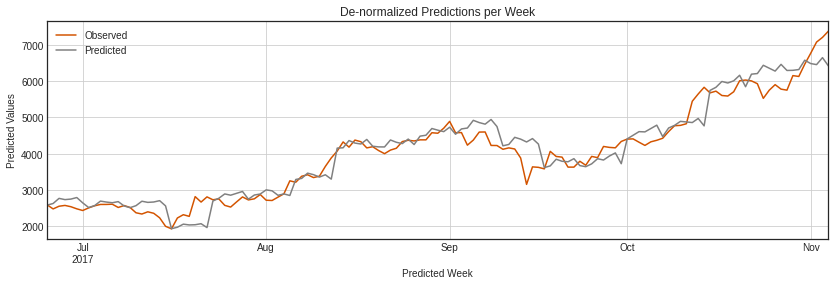

In [ ]:
#  Denormalize predictions
predicted_close = predicted.groupby('iso_week').apply(
    lambda x: denormalize(test[:-3], x))
#  Plot denormalized predictions and observed closing prices in test set
plot_two_series(A=test[:-3],
                B=predicted_close,
                variable='close',
                title='De-normalized Predictions per Week')

In [ ]:
A = test[:-3]['close_point_relative_normalization']
B = predicted_close['close_point_relative_normalization']

print(f'Normalized RMSE: {rmse(A, B):.2f}')

Normalized RMSE: 0.10


In [ ]:
A = test[:-3]['close']
B = predicted_close['close']

print(f'De-normalized RMSE: {rmse(A, B):.2f}')
print(f'De-normalized MAPE: {mape(A, B):.2f}')

De-normalized RMSE: 352.22
De-normalized MAPE: 6.72


In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from datetime import datetime, timedelta
from keras.models import load_model, Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout, ActivityRegularization
from keras.callbacks import TensorBoard

from utilities_activity7 import (
    create_groups, split_lstm_input, 
    train_model, plot_two_series, rmse, 
    mape, denormalize)

np.random.seed(0)

Autosaving every 5 seconds


In [ ]:
#  Load datasets
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [ ]:
#  Convert `date` column to datetime type
test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)
test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [ ]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

In [ ]:
#  TASK:
#  Load data for `v0` of our model.
#  Initialize variables
period_length = 7
number_of_periods = 76
batch_size = 1


model_v0=load_model('bitcoin_lstm_v0.h5')
#  Call this `model_v0`.
##  Model 1: two LSTM layers
model_v0 

In [ ]:
%%time
train_model(model=model_v0, X=X_train, Y=Y_train, epochs=100, version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4243e-04
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3095e-04
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3279e-04
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 6.4601e-04
Epoch 13/100
1/1 [==========================

In [ ]:
#  Model 1: two LSTM layers
model_v1 = Sequential()

model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))   # note return_sequences is now true
model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))
model_v1.add(Dense(units=period_length))
model_v1.add(Activation("linear"))

model_v1.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time
train_model(model=model_v1, X=X_train, Y=Y_train, epochs=100, version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/100
1/1 [==============================] - 0s 2ms/st

In [ ]:
# Model 2: two LSTM layers, trained for 300 epochs
model_v2 = Sequential()

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v2.add(Dense(units=period_length))
model_v2.add(Activation("linear"))

model_v2.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time

#  TASK:
#  Change the number of epochs below
#  to 300 and evaluate the results on TensorBoard.
#
train_model(model=model_v2, X=X_train, Y=Y_train, epochs=300, version=2, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 9.1998e-04
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 7.8864e-04
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 6.7494e-04
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 5.7579e-04
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 4.8902e-04
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 4.1302e-04
Epoch 13/300
1/1 [===================

In [ ]:
# Model 3: two LSTM layers, trained for 300 epochs,
#          tanh activation function
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

#  TASK:
#  Change the activation function
#  from "linear" to "tanh".
#
model_v3.add(Activation("tanh"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model_v4 = Sequential()
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

#  TASK:
#  Implement a Dropout() here.
Dropout(rate=0.2)

model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

#  TASK:
#  Implement a Dropout() here too.
Dropout(rate=0.2)


model_v4.add(Dense(units=period_length))
model_v4.add(Activation("tanh"))

model_v4.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time
train_model(model=model_v4, X=X_train, Y=Y_train, epochs=600, version=4, run_number=0)

Epoch 1/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 2/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 3/600
1/1 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 7/600
1/1 [==============================] - 0s 3ms/step - loss: 9.0722e-04
Epoch 8/600
1/1 [==============================] - 0s 2ms/step - loss: 8.1732e-04
Epoch 9/600
1/1 [==============================] - 0s 2ms/step - loss: 7.3669e-04
Epoch 10/600
1/1 [==============================] - 0s 3ms/step - loss: 6.6385e-04
Epoch 11/600
1/1 [==============================] - 0s 3ms/step - loss: 5.9767e-04
Epoch 12/600
1/1 [==============================] - 0s 3ms/step - loss: 5.3730e-04
Epoch 13/600
1/1 [===================

In [ ]:
combined_set = np.concatenate((train_data, test_data), axis=1)

def evaluate_model(model, kind='series'):
    """Compute the MSE for all future weeks in period.
    
    Parameters
    ----------
    model: Keras trained model
    
    kind: str, default 'series'
        Kind of evaluation to perform. If 'series', 
        then the model will perform an evaluation 
        over the complete series.
    
    Returns
    -------
    evaluated_weeks: list
        List of MSE values for each evaluated
        test week.
    """
    if kind == 'series':
        predicted_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+76]
            predicted_weeks.append(model.predict(input_series))

        predicted_days = []
        for week in predicted_weeks:
            predicted_days += list(week[0])

        return predicted_days
    else:
        evaluated_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]

            X_test = input_series[0:,:-1].reshape(1, input_series.shape[1] - 1, 7)
            Y_test = input_series[0:,-1:][0]

            result = model.evaluate(x=X_test, y=Y_test, verbose=0)
            evaluated_weeks.append(result)
            
            return evaluated_weeks

In [ ]:
def plot_weekly_mse(series, model_name, color):
    """Plot weekly MSE."""
    ax = pd.Series(series).plot(drawstyle="steps-post",
                                figsize=(14,4),
                                color=color,
                                grid=True,
                                label=model_name,
                                alpha=0.7,
                                title='Mean Squared Error (MSE) for Test Data (all models)'.format(
                                       model_name))

    ax.set_xticks(range(0, len(series)))
    ax.set_xlabel("Predicted Week")
    ax.set_ylabel("MSE")

    return ax

In [ ]:
def plot_weekly_predictions(predicted_days, name, display_plot=True, 
                            variable='close'):
    """Plot weekly predictions and calculate RMSE and MAPE."""
    
    # Create dataframe to store predictions and associated dates
    last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
    list_of_days = []
    for days in range(1, len(predicted_days) + 1):
        D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
        list_of_days.append(D)
    
    predicted = pd.DataFrame({
        'date': list_of_days,
        'close_point_relative_normalization': predicted_days
    })
    
    # Convert `date` variable to datetime
    predicted['date'] = predicted['date'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Create iso_week column in `predicted` dataframe
    predicted['iso_week'] = predicted['date'].apply(
        lambda x: x.strftime('%Y-%U'))

    # Denormalize predictions
    predicted_close = predicted.groupby('iso_week').apply(
        lambda x: denormalize(test[:-3], x))

    # Plot denormalized predictions and observed values
    plot_two_series(test[:-3], predicted_close,
                    variable=variable,
                    title=f'{name}: Predictions per Week')
    
    # Calculate RMSE and MAPE
    print(f'RMSE: {rmse(test[:-3][variable], predicted_close[variable]):.2f}')
    print(f'MAPE: {mape(test[:-3][variable], predicted_close[variable]):.2f}%')

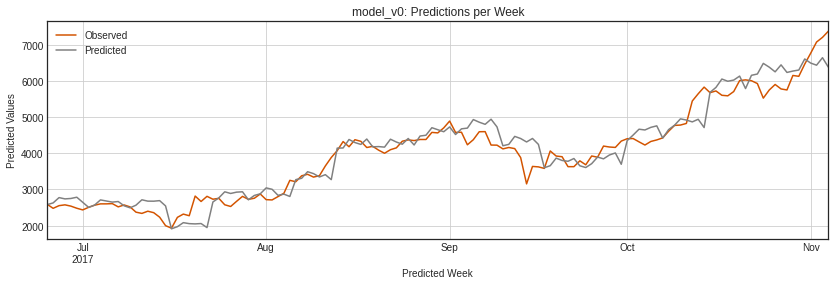

RMSE: 358.77
MAPE: 6.85%


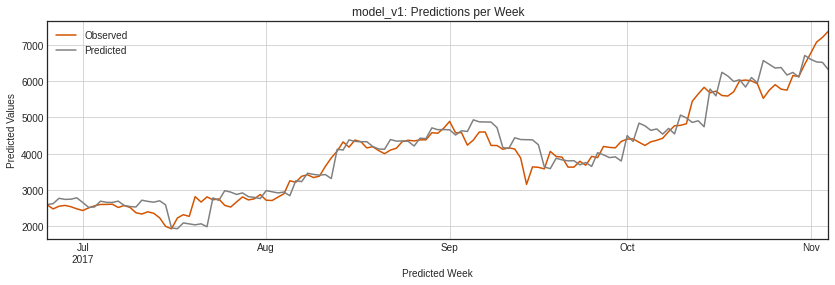

RMSE: 365.77
MAPE: 6.94%


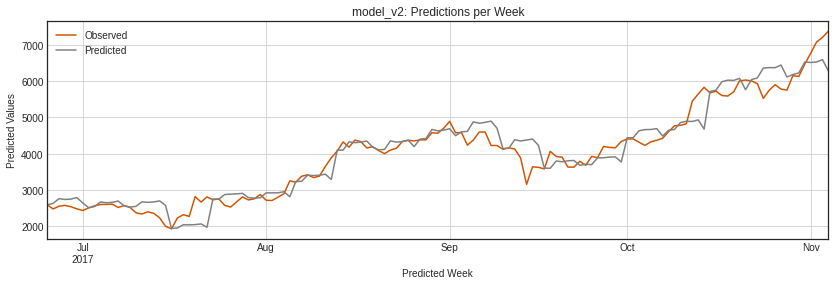

RMSE: 350.06
MAPE: 6.46%


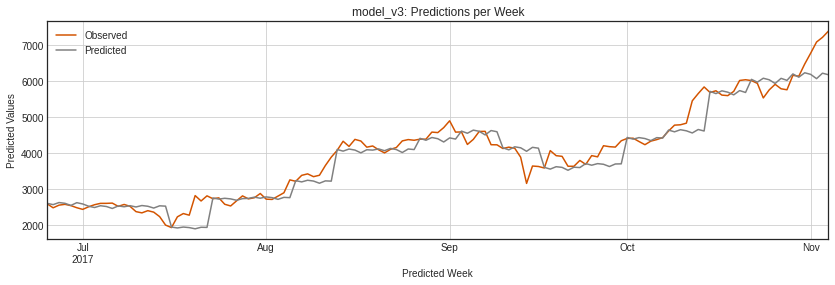

RMSE: 356.96
MAPE: 6.04%


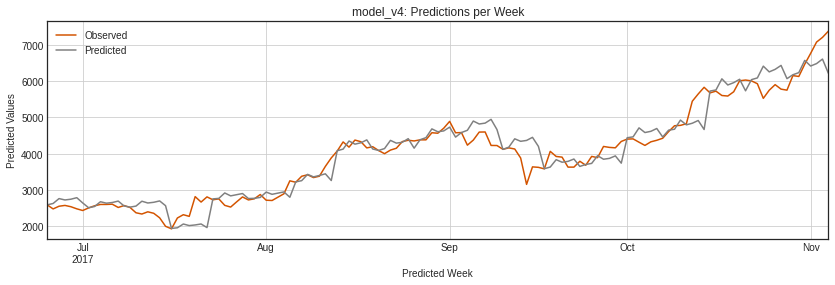

RMSE: 353.58
MAPE: 6.47%


In [ ]:
#  Evaluate each model trained in this activity in sequence
models = [model_v0, model_v1, model_v2, model_v3, model_v4]
for i, M in enumerate(models):
    predicted_days = evaluate_model(M, kind='series')
    plot_weekly_predictions(predicted_days, f'model_v{i}')